In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsRegressor

import matplotlib.pyplot as plt

In [2]:
#edit directory to userID
#test
userID = 'opeters1'
player_rank = pd.read_csv('lr_player_rank.csv')
rf_player_rank = pd.read_csv('rf_player_rank.csv')
war_data = pd.read_csv('war_data.csv')

In [4]:
# Clean the war data
cleaned_war = war_data[['war', 'playerid', 'year']][war_data.year <= 2015].copy()
cleaned_war['new_pid'] = [str(x) + '_' + str(y) for x, y in zip(cleaned_war['playerid'], cleaned_war['year'])]
war_df = cleaned_war[['war', 'new_pid']].sort_values(by='new_pid')

cleaned_player = player_rank[player_rank.Year >= 2005].copy()
cleaned_player['new_pid'] = [str(x) + '_' + str(y) for x, y in zip(cleaned_player['playerID'], cleaned_player['Year'])]
player_df = cleaned_player[['Score', 'new_pid']].sort_values(by='new_pid')

rf_cleaned_player = rf_player_rank[rf_player_rank.Year >= 2005].copy()
rf_cleaned_player['new_pid'] = [str(x) + '_' + str(y) for x, y in zip(rf_cleaned_player['playerID'], rf_cleaned_player['Year'])]
rf_player_df = rf_cleaned_player[['Score', 'new_pid']].sort_values(by='new_pid')


In [5]:
print(player_df)
print(war_df)

          Score         new_pid
358    0.336853  abercre01_2006
17282  0.432915  abreubo01_2005
16857  0.427974  abreubo01_2006
17750  0.439229  abreubo01_2006
14094  0.409883  abreubo01_2007
...         ...             ...
7217   0.383162  zobribe01_2015
10126  0.393640  zobribe01_2015
2433   0.361641  zuninmi01_2013
340    0.336473  zuninmi01_2014
71     0.320524  zuninmi01_2015

[4174 rows x 2 columns]
       war         new_pid
1231   0.6  aardsda01_2006
2347  -0.4  aardsda01_2007
3387  -0.3  aardsda01_2008
5222   1.7  aardsda01_2009
6320   0.7  aardsda01_2010
...    ...             ...
10579  4.4  zobribe01_2014
2529   0.2  zumayjo01_2007
4725  -0.1  zumayjo01_2009
5836   0.8  zumayjo01_2010
10471  0.4  zuninmi01_2014

[11796 rows x 2 columns]


In [6]:
merged = pd.merge(player_df, war_df, how='inner', on=['new_pid'])
pids = merged['new_pid'].to_list()
war_x = merged['war'].to_list()
score_y = merged['Score'].to_list()

In [7]:
rf_merged = pd.merge(rf_player_df, war_df, how='inner', on=['new_pid'])
rf_pids = rf_merged['new_pid'].to_list()
rf_war_x = rf_merged['war'].to_list()
rf_score_y = rf_merged['Score'].to_list()

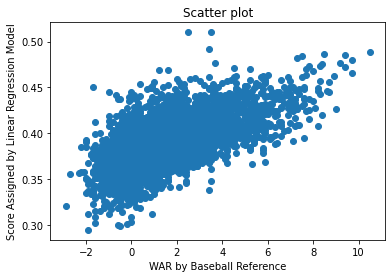

In [11]:
plt.scatter(war_x, score_y)
plt.title('Scatter plot')
plt.xlabel('WAR by Baseball Reference')
plt.ylabel('Score Assigned by Linear Regression Model')
plt.show()

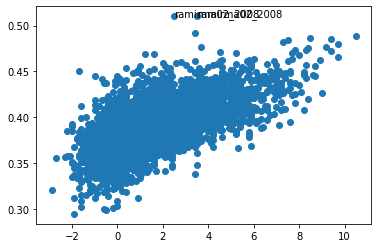

In [12]:
fig, ax = plt.subplots()
ax.scatter(war_x, score_y)

for i, pid in enumerate(pids):
    if war_x[i] > 2 and score_y[i] > .5:
        ax.annotate(pid, (war_x[i], score_y[i]))


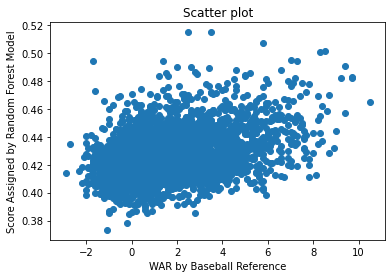

In [13]:
plt.scatter(rf_war_x, rf_score_y)
plt.title('Scatter plot')
plt.xlabel('WAR by Baseball Reference')
plt.ylabel('Score Assigned by Random Forest Model')
plt.show()

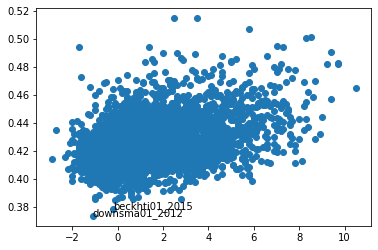

In [20]:
fig, ax = plt.subplots()
ax.scatter(rf_war_x, rf_score_y)

for i, pid in enumerate(pids):
    if rf_score_y[i] < .38:
        ax.annotate(pid, (rf_war_x[i], rf_score_y[i]))
